# Importación patrón ETL

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

from Extractor import ExtractRings
from Transformer import TransformRings
from Analyzer import AnalyzeRings


In [4]:
er=ExtractRings()
tr=TransformRings()
an=AnalyzeRings()

# Extracción de los datos en bruto

In [6]:
raw_data=er.Extract (path='../data/spai067-1.rwl',encoding='UTF-8')

# Aplicación de las transforamciones para obtener los datos con el formato deseado

In [60]:
data_frame=tr.Transform(raw_data)
data_frame.head()

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
UF02NNXX,539,544,543,523,358,489,365,378,232,153,...,158,256,234,168,157,284,167,102,0,0
UF56EEXX,126,206,139,116,72,74,86,88,60,31,...,94,127,113,82,71,155,85,38,47,101
UF60SWXX,238,368,161,102,123,214,223,248,149,71,...,188,169,124,80,53,160,153,37,43,96
UF18NNXX,310,375,248,151,129,118,91,116,81,52,...,112,154,114,82,49,127,101,41,41,101
UF53NNXX,386,488,271,178,165,287,175,249,171,86,...,223,370,218,156,112,267,186,80,72,0


# Obtenemos el informe estadístico

In [62]:
result = an.statistics(data_frame=data_frame)
result.head()

,Media,Desviacion tipica,Min,Max
1972,219.462963,179.681685,0,608
1973,305.648148,192.561694,0,695
1974,213.981481,119.162430,0,543
1975,137.259259,88.489628,0,523
1976,121.129630,73.818859,0,358


# Utilizamos el resumen estadístico para mostrar la relación entre crecimiento y temperatura.
* Se puede observar que hay una clara relación entre el crecimiento del arbol y la precipitación, como era de esperar. Si no se hubiera mostrado esta relación cabría pensar que ha habido algún tipo de perturbación que ha afectado al crecimiento. Esta información es valiosa para guiar la gestión forestal.

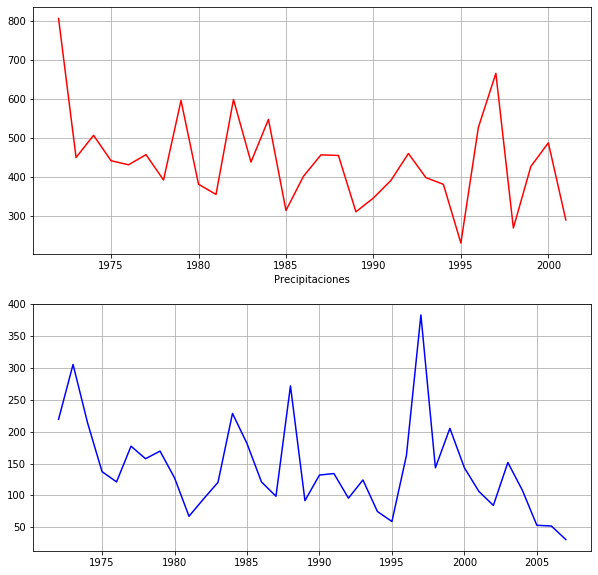

In [82]:
precipitaciones=pd.read_csv('../data/precipitaciones.csv', sep=";")
precipitaciones.index=precipitaciones.YEAR
precipitaciones=precipitaciones.loc[1972:2007]

fig,axs = plt.subplots(2, 1,figsize=(10,10))

x=precipitaciones.YEAR.astype('int')
y=precipitaciones.mm.replace(".",",").astype('float')
axs[0].plot(x,y,'r')
axs[0].set_xlabel("Precipitaciones")
axs[0].grid(True)

#plt.plot(x,y,'r')

x=result.index
y=result.Media
axs[1].plot(x,y,'b')
axs[1].grid(True)
#plt.plot(x,y,'b')
